# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?units=metric&appid="+weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    
    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather ['coord']['lon']
        city_max_temp = city_weather ['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bethel
Processing Record 2 of Set 1 | aasiaat
Processing Record 3 of Set 1 | arvika
Processing Record 4 of Set 1 | mejit
Processing Record 5 of Set 1 | saint-francois
Processing Record 6 of Set 1 | livingston
Processing Record 7 of Set 1 | edinburgh of the seven seas
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | takoradi
Processing Record 10 of Set 1 | puerto natales
Processing Record 11 of Set 1 | nizhneudinsk
Processing Record 12 of Set 1 | anadyr
Processing Record 13 of Set 1 | grytviken
Processing Record 14 of Set 1 | uliastay
Processing Record 15 of Set 1 | hilo
Processing Record 16 of Set 1 | stanley
Processing Record 17 of Set 1 | puerto ayora
Processing Record 18 of Set 1 | enewetak
Processing Record 19 of Set 1 | west end
Processing Record 20 of Set 1 | guerrero negro
Processing Record 21 of Set 1 | souillac
Processing Record 22 of Set 1 | waitangi
Processing Record 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          555
Lat           555
Lng           555
Max Temp      555
Humidity      555
Cloudiness    555
Wind Speed    555
Country       555
Date          555
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bethel,41.3712,-73.4140,-0.27,55,0,1.54,US,1707193158
1,aasiaat,68.7098,-52.8699,-29.07,85,78,4.12,GL,1707193346
2,arvika,59.6553,12.5852,-9.66,95,85,1.14,SE,1707193346
3,mejit,10.2753,170.8646,26.84,81,37,8.18,MH,1707193347
4,saint-francois,46.4154,3.9054,4.25,100,100,1.03,FR,1707193347


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,-0.27,55,0,1.54,US,1707193158
1,aasiaat,68.7098,-52.8699,-29.07,85,78,4.12,GL,1707193346
2,arvika,59.6553,12.5852,-9.66,95,85,1.14,SE,1707193346
3,mejit,10.2753,170.8646,26.84,81,37,8.18,MH,1707193347
4,saint-francois,46.4154,3.9054,4.25,100,100,1.03,FR,1707193347


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

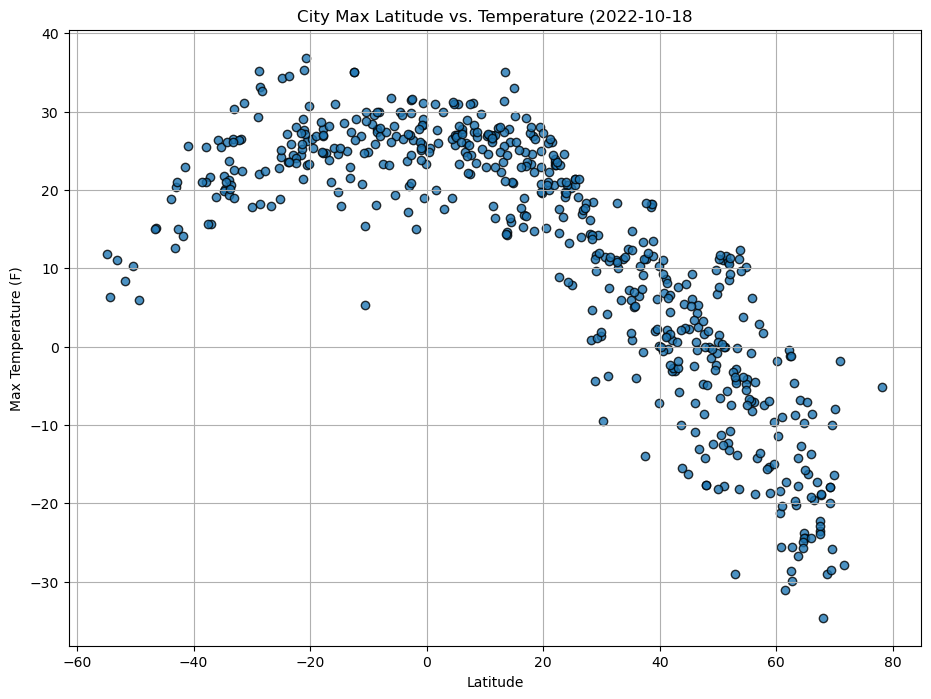

In [8]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]

# Incorporate the other graph properties
fig1, ax1 = plt.subplots(figsize=(11,8))
plt.scatter(x_values, y_values, edgecolor="black", linewidth=1,marker="o", alpha=0.8)
plt.title(f"City Max Latitude vs. Temperature (2022-10-18")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

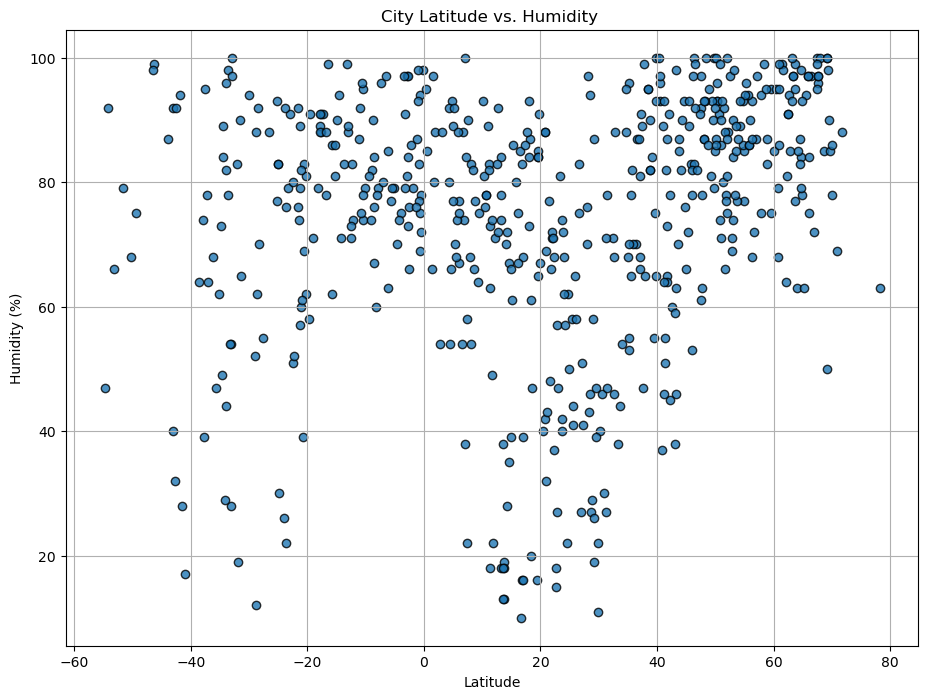

In [9]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]

# Incorporate the other graph properties
fig1, ax1 = plt.subplots(figsize=(11, 8))
plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

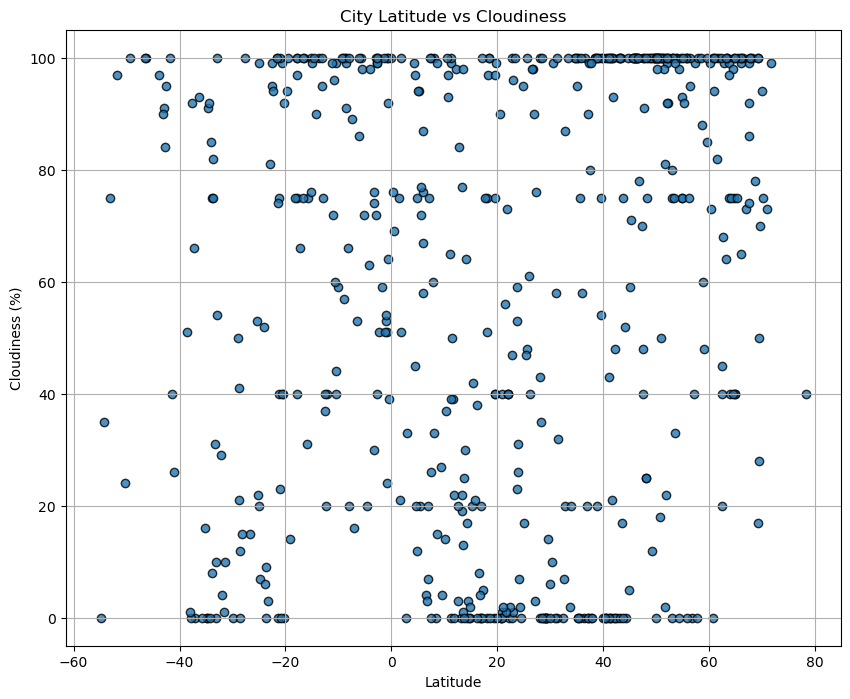

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]

# Incorporate the other graph properties
fig1, ax1 = plt.subplots(figsize=(10,8))
markersize=12
plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

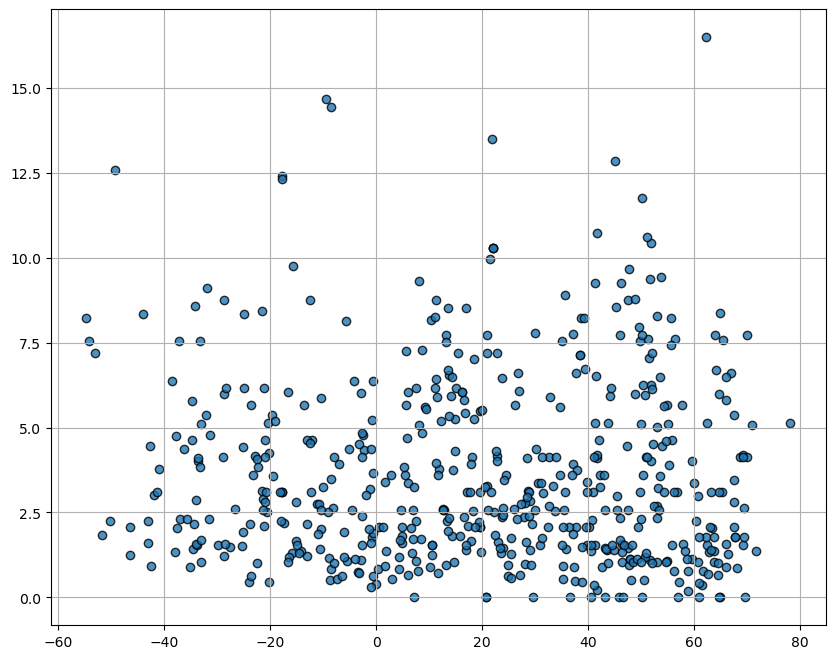

In [11]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]

# Incorporate the other graph properties
fig1, ax1 = plt.subplots(figsize=(10,8))
markersize=12
plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)
plt.xlabel=("Latitude")
plt.ylable=("Wind Speed (m/s)")
plt.title= (f"City Latitude vs. Wind Speed")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [19]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, hemisphere, text_coordinates, ylin=None):
    (slone, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    values= x_values * slope + intercept
    
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    fig1, ax1 = plt.subplots(figsize=(12,8))
    plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)
    plt.plot(x_values,regress_values,"r-")
  
    plt.xlabel(x_label,fontsize=14)
    plt.ylabel(y_label,fontsize=14)
    if ylim is not None:
        plt.ylim(0, ylim)
    plt.annotate(line_eq, text_coordinates, fontsize=20, color="red")
    
    # Print r square value
    print(f"The r-squared is: {rvalue**2}")
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")

In [20]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_weather_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,-0.27,55,0,1.54,US,1707193158
1,aasiaat,68.7098,-52.8699,-29.07,85,78,4.12,GL,1707193346
2,arvika,59.6553,12.5852,-9.66,95,85,1.14,SE,1707193346
3,mejit,10.2753,170.8646,26.84,81,37,8.18,MH,1707193347
4,saint-francois,46.4154,3.9054,4.25,100,100,1.03,FR,1707193347


In [21]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
6,edinburgh of the seven seas,-37.0676,-12.3116,15.60,64,0,2.30,SH,1707193348
7,lebu,-37.6167,-73.6500,15.68,95,92,2.03,CL,1707193348
9,puerto natales,-51.7236,-72.4875,8.43,79,97,1.83,CL,1707193122
12,grytviken,-54.2811,-36.5092,6.31,92,35,7.54,GS,1707193350
16,puerto ayora,-0.7393,-90.3518,25.86,94,51,1.79,EC,1707193351


###  Temperature vs. Latitude Linear Regression Plot

TypeError: 'str' object is not callable

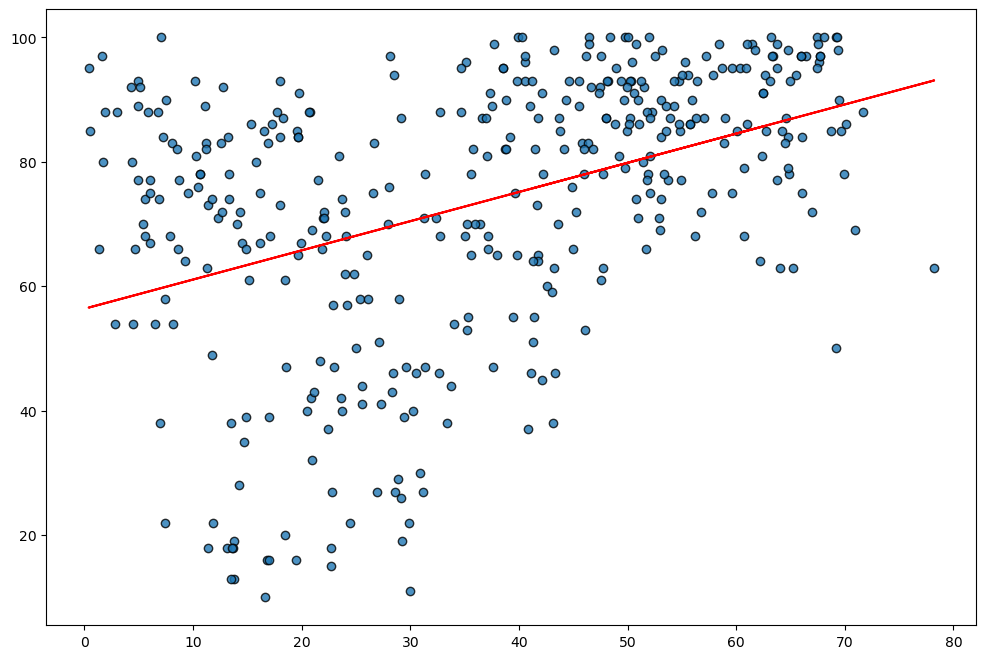

In [22]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_weather_df['Lat']
y_values = northern_hemi_weather_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plot_linear_regression(x_values, y_values, "Latitude", "Humidity (%)", "Northern",(50,50))
plt.savefig("./output_data/northern_hem_linear_lat_vs_humidity.png", bbox_inches="tight")
plt.show()

ValueError: x and y must have same first dimension, but have shapes (162,) and (393,)

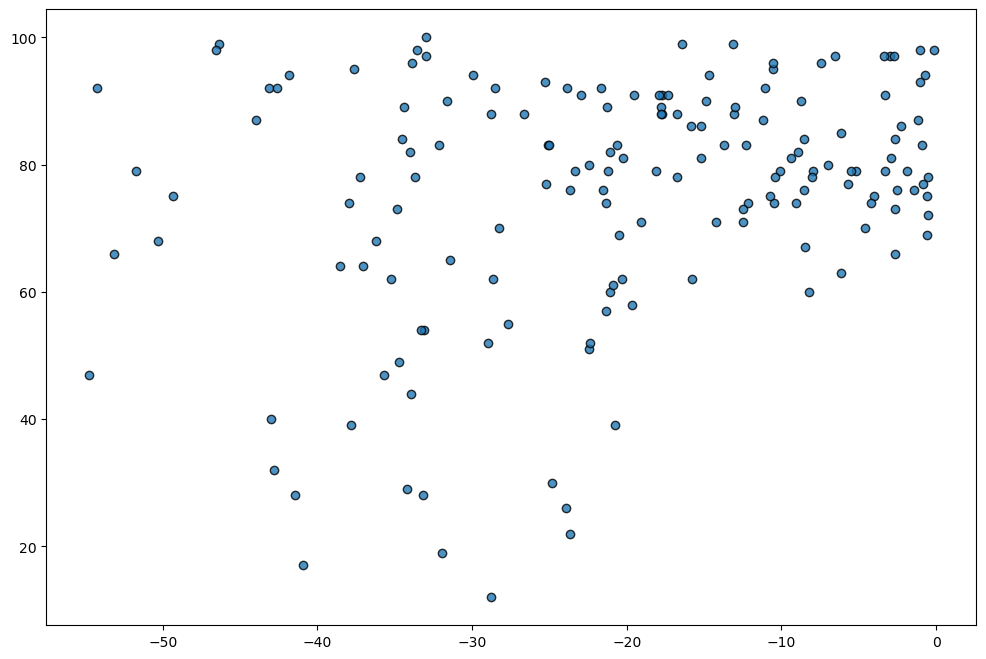

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
plot_linear_regression(x_values, y_values, "Latitude", "Humidity (%)", "Southern",(50, 50), 100)
plt.savefig("./output_data/southern_hem_linear_lat_vs_humudity.png", bbox_inches="tight")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

TypeError: 'str' object is not callable

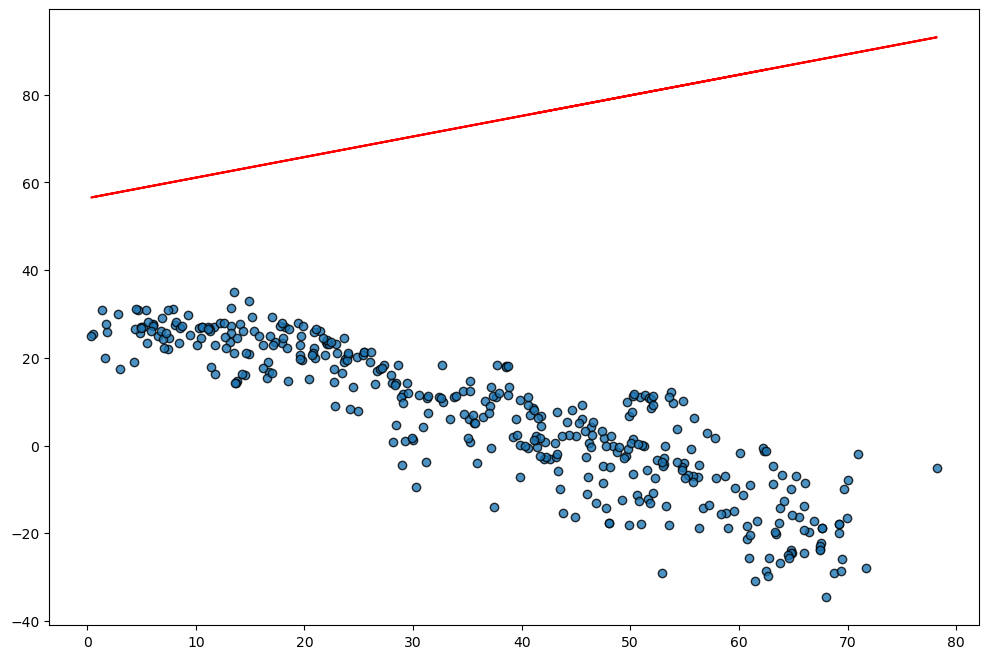

In [23]:
# Northern Hemisphere
x_values = northern_hemi_weather_df["Lat"]
y_values = northern_hemi_weather_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Latitude", "Max Temp (F)", "Northern", (10, 10))

# Save the figure
plt.savefig("./output_data/northern_hem_linear_lat_vs_max_temp.png", bbox_inches="tight")
plt.show()

ValueError: x and y must have same first dimension, but have shapes (162,) and (393,)

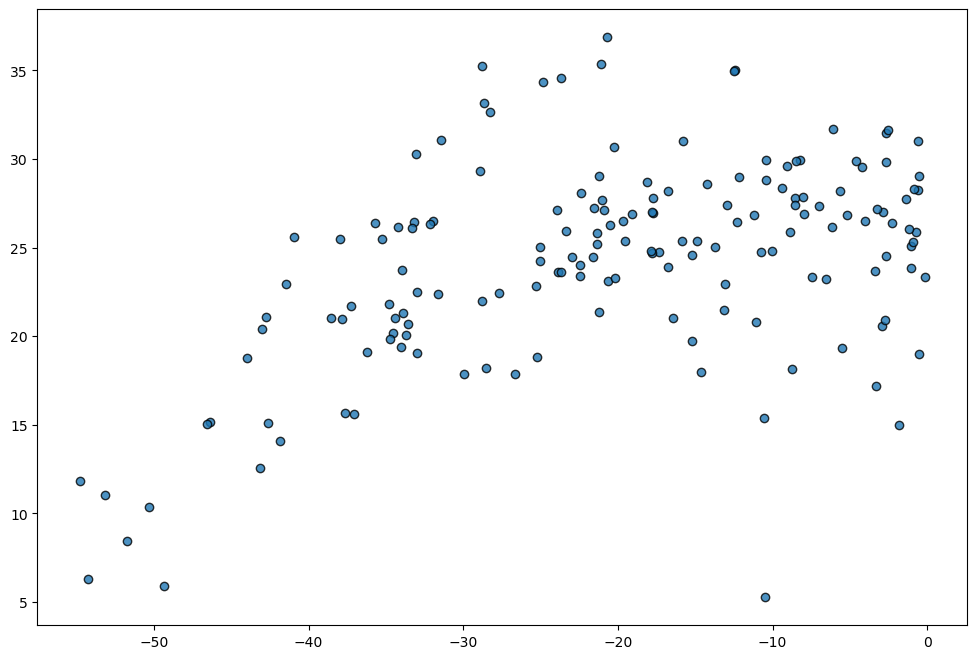

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Latitude", "Max Temp (F)", "Southern", (-52, 75))

# Save the figure
plt.savefig("./output_data/southern_hem_linear_lat_vs_max_temp.png", bbox_inches="tight")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

TypeError: 'str' object is not callable

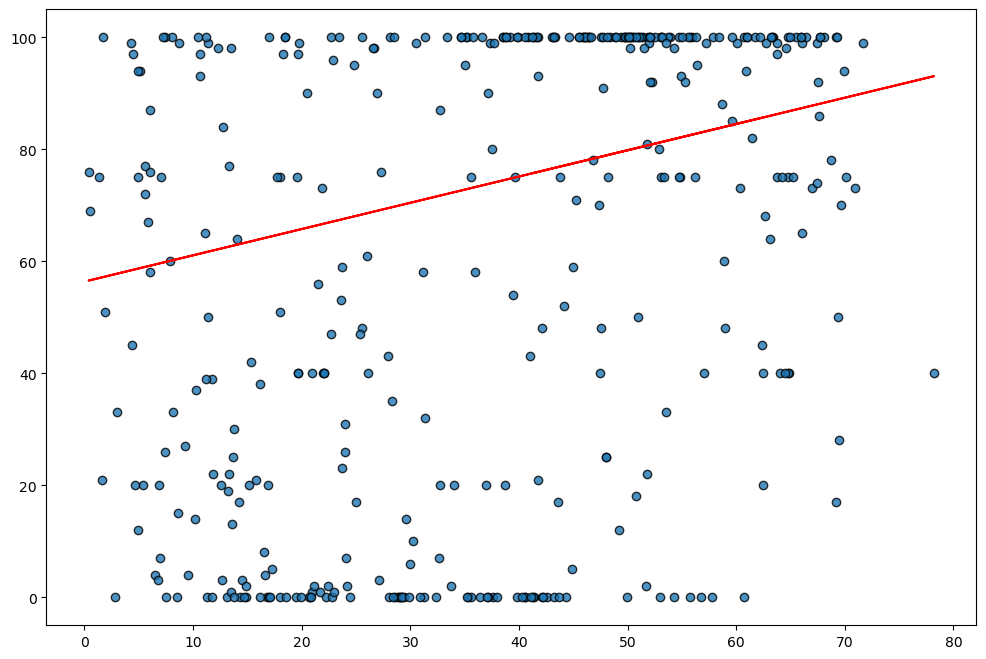

In [24]:
# Northern Hemisphere
x_values = northern_hemi_weather_df['Lat']
y_values = northern_hemi_weather_df['Cloudiness']
plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness (%)", "Northern", (20, 60))

plt.savefig("./output_data/northern_hem_linear_lat_vs_cloudiness.png", bbox_inches="tight")
plt.show()

ValueError: x and y must have same first dimension, but have shapes (162,) and (393,)

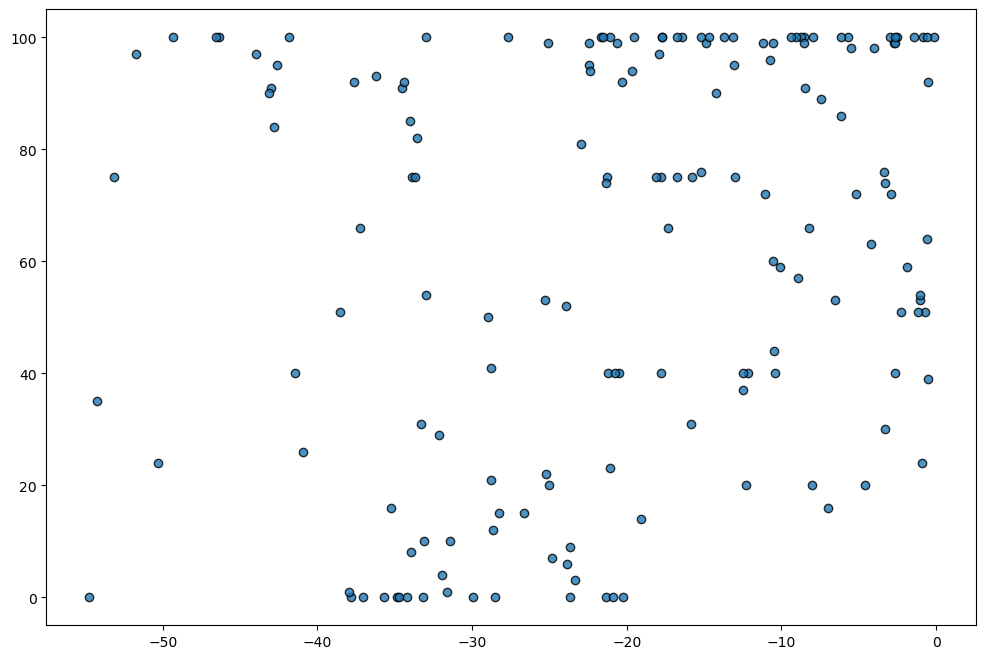

In [25]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness(%)", "Southern",(-45, 60))
plt.savefig("./output_data/southern_hem_linear_lat_vs_cloudiness.png", bbox_inches="tight")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

TypeError: 'str' object is not callable

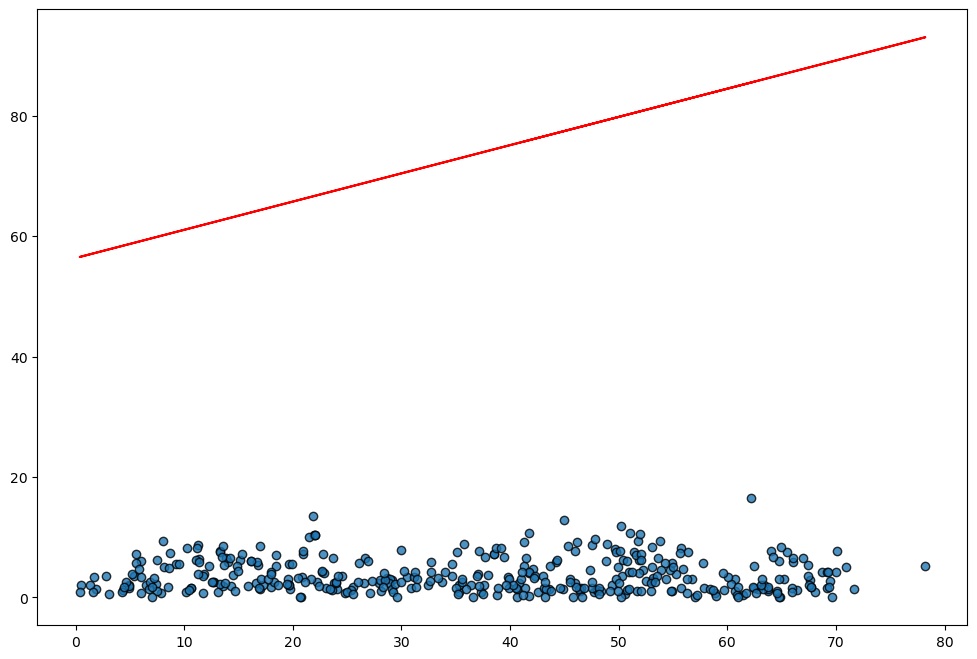

In [26]:
# Northern Hemisphere
x_values = northern_hemi_weather_df['Lat']
y_values = northern_hemi_weather_df['Wind Speed']
plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed (mph)", "Northern",(20, 25))
plt.savefig("./output_data/northern_hem_linear_lat_vs_wind_speed.png", bbox_inches="tight")
plt.show()

ValueError: x and y must have same first dimension, but have shapes (162,) and (393,)

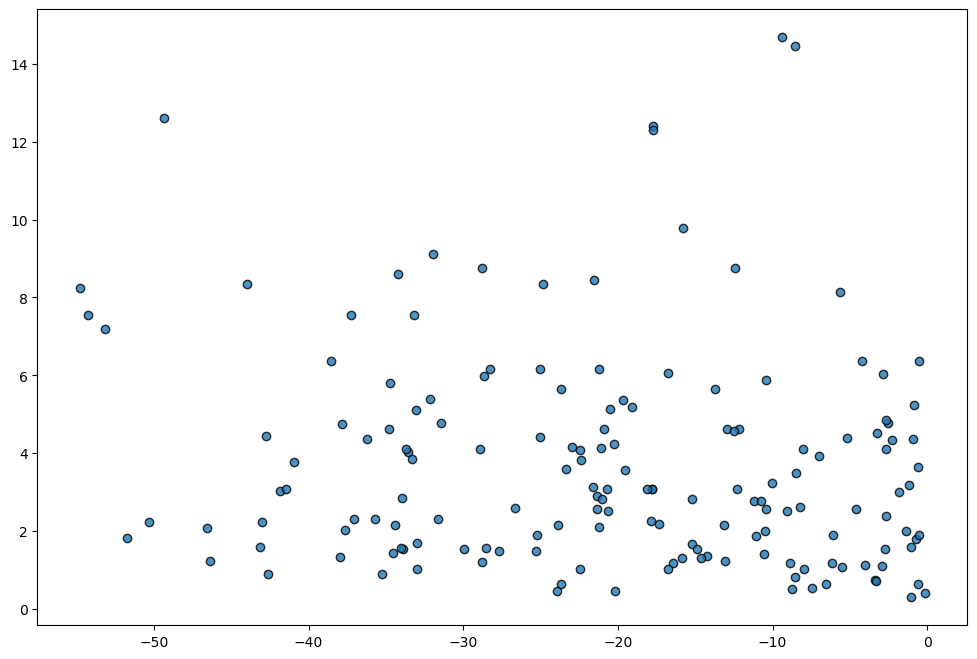

In [27]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed (mph)", "Southern",(-40, 25))
plt.savefig("./output_data/southern_hem_linear_lat_vs_wind_speed.png", bbox_inches="tight")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE